In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
match_df = pd.read_csv(r"C:\Users\Anurag\Desktop\Data Science\ipl\IPL Matches 2008-2020.csv")
ball_df = pd.read_csv(r"C:\Users\Anurag\Desktop\Data Science\ipl\IPL Ball-by-Ball 2008-2020.csv")

In [3]:
match_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
ball_df.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [5]:
match_df.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [6]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [7]:
ball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [15]:
print('Total mathces played: ',match_df['id'].count())
print('\nVenue of mathces: ', match_df['venue'].unique())
print("\nTeams of matches: ", match_df['team1'].unique())

Total mathces played:  816

Venue of mathces:  ['M Chinnaswamy Stadium' 'Punjab Cricket Association Stadium, Mohali'
 'Feroz Shah Kotla' 'Wankhede Stadium' 'Eden Gardens'
 'Sawai Mansingh Stadium' 'Rajiv Gandhi International Stadium, Uppal'
 'MA Chidambaram Stadium, Chepauk' 'Dr DY Patil Sports Academy' 'Newlands'
 "St George's Park" 'Kingsmead' 'SuperSport Park' 'Buffalo Park'
 'New Wanderers Stadium' 'De Beers Diamond Oval' 'OUTsurance Oval'
 'Brabourne Stadium' 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Holkar Cricket Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharjah Cricket Stadium' 'Dubai International Cricket Stadium'
 'Maharashtra Cricket Association Stadium'
 'Punjab Cricket Association IS Bindr

In [16]:
match_df['Season'] = pd.DatetimeIndex(match_df['date']).year
match_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [22]:
match_per_season = match_df.groupby('Season')['id'].count().reset_index().rename(columns={'id':'Matches'})
match_per_season

,Season,Matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


C:\Users\Anurag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total matches played in each Season')

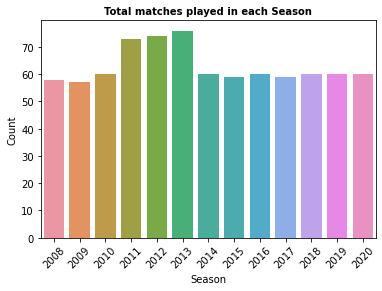

In [28]:
sns.countplot(match_df['Season'])
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title("Total matches played in each Season", fontsize=10, fontweight='bold')

In [30]:
season_df = match_df[['id', 'Season']].merge(ball_df, left_on='id', right_on='id', how='left').drop('id', axis=1)
season_df

,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,2020,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,2020,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,2020,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,2020,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


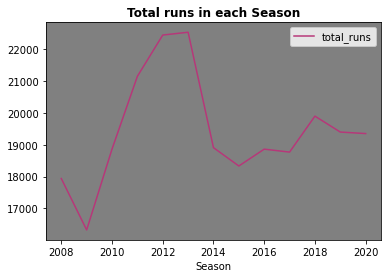

In [31]:
season = season_df.groupby('Season')['total_runs'].sum().reset_index()
p = season.set_index('Season')
ax = plt.axes()
ax.set(facecolor = 'grey')
sns.lineplot(data=p, palette='magma')
plt.title('Total runs in each Season', fontsize=12, fontweight='bold')
plt.show()

In [34]:
runs_per_season = pd.concat([match_per_season, season.iloc[:, 1]], axis=1)
runs_per_season['Runs scored per match'] = runs_per_season['total_runs']/runs_per_season['Matches']
runs_per_season.set_index('Season', inplace=True)
runs_per_season

,Matches,total_runs,Runs scored per match
Season,,,
2008,58,17937,309.258621
2009,57,16320,286.315789
2010,60,18864,314.400000
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22541,296.592105
2014,60,18909,315.150000
2015,59,18332,310.711864
2016,60,18862,314.366667


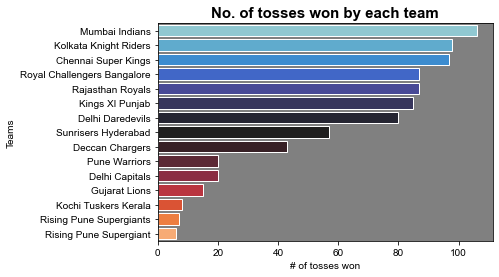

In [35]:
toss = match_df['toss_winner'].value_counts()
ax = plt.axes()
ax.set(facecolor='grey')
sns.set(rc={'figure.figsize':(15, 10)}, style='darkgrid')
ax.set_title('No. of tosses won by each team', fontsize=15, fontweight='bold')
sns.barplot(y=toss.index, x=toss, orient='h', palette='icefire', saturation=1)
plt.xlabel('# of tosses won')
plt.ylabel('Teams')
plt.show()

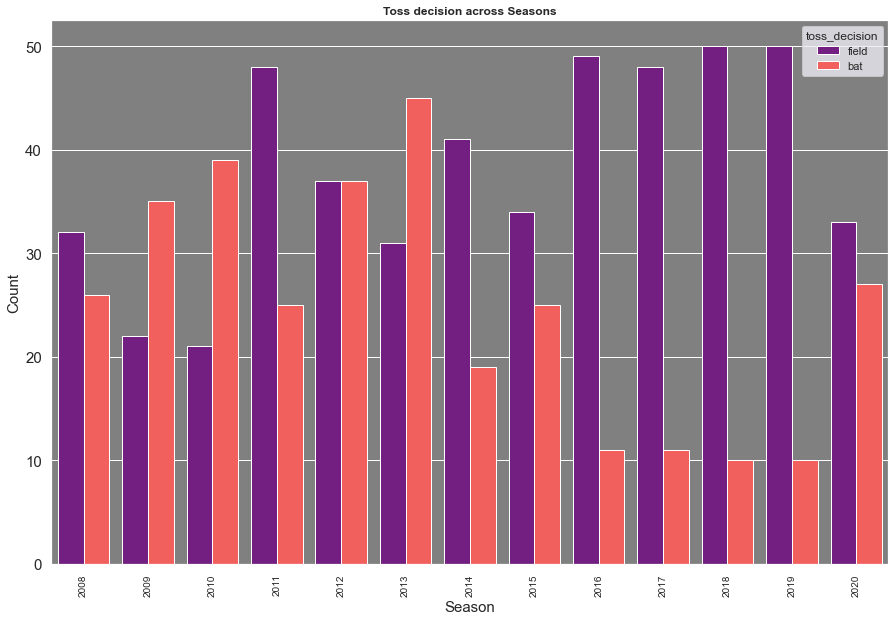

In [36]:
ax = plt.axes()
ax.set(facecolor = 'grey')
sns.countplot(x='Season', hue='toss_decision', data=match_df, palette='magma', saturation=1)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Season', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Toss decision across Seasons', fontsize=12, fontweight='bold')
plt.show()

In [37]:
match_df['result'].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

In [40]:
match_df.venue[match_df.result!='runs'].mode()

0    Eden Gardens
Name: venue, dtype: object

In [42]:
match_df.venue[match_df.result!='wickets'].mode()

0    Feroz Shah Kotla
Name: venue, dtype: object

In [43]:
match_df.venue[match_df.toss_winner=='Mumbai Indians'][match_df.winner=='Mumbai Indians'].mode()

0    Wankhede Stadium
Name: venue, dtype: object

In [44]:
match_df.winner[match_df.result!='runs'].mode()

0    Kolkata Knight Riders
1           Mumbai Indians
Name: winner, dtype: object

In [45]:
match_df.winner[match_df.result!='wickets'].mode()

0    Mumbai Indians
Name: winner, dtype: object

C:\Users\Anurag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


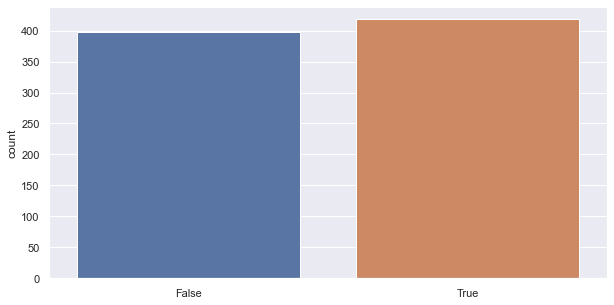

In [46]:
toss = match_df['toss_winner']==match_df['winner']
plt.figure(figsize=(10, 5))
sns.countplot(toss)
plt.show()

C:\Users\Anurag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


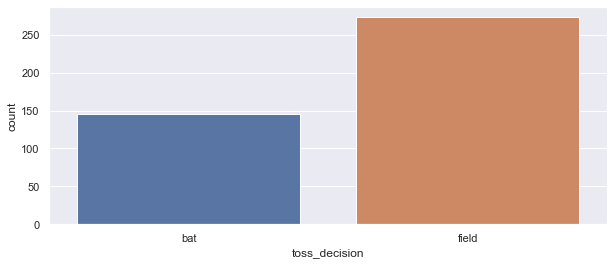

In [47]:
plt.figure(figsize=(10, 4))
sns.countplot(match_df.toss_decision[match_df.toss_winner==match_df.winner])
plt.show()

In [49]:
player = (ball_df['batsman']=='SK Raina')
df_raina = ball_df[player]
df_raina.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
246,335983,1,10,3,SK Raina,MEK Hussey,PP Chawla,2,0,2,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
247,335983,1,10,4,SK Raina,MEK Hussey,PP Chawla,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
248,335983,1,10,5,SK Raina,MEK Hussey,PP Chawla,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
249,335983,1,10,6,SK Raina,MEK Hussey,PP Chawla,4,0,4,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
253,335983,1,11,4,SK Raina,MEK Hussey,K Goel,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab


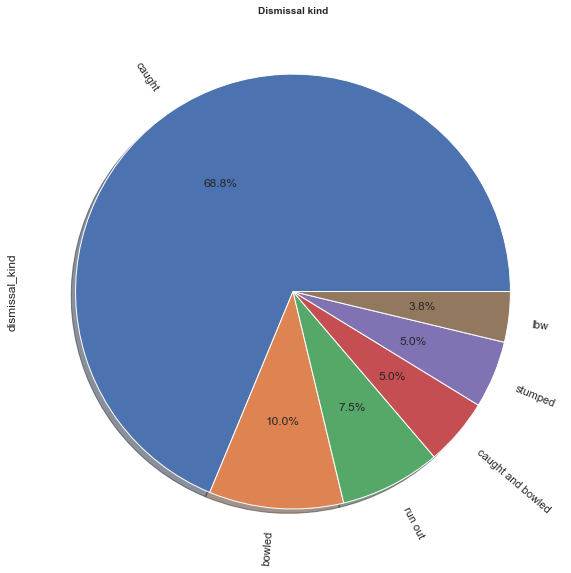

In [52]:
df_raina['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, rotatelabels=True)
plt.title('Dismissal kind', fontweight='bold', fontsize=10)
plt.show()

In [55]:
def count(df, runs):
    return len(df[df['batsman_runs']==runs])*runs

In [56]:
print("Runs scored from 1's : ", count(df_raina, 1))
print("Runs scored from 2's : ", count(df_raina, 2))
print("Runs scored from 3's : ", count(df_raina, 3))
print("Runs scored from 4's : ", count(df_raina, 4))
print("Runs scored from 6's : ", count(df_raina, 6))

Runs scored from 1's :  1666
Runs scored from 2's :  528
Runs scored from 3's :  33
Runs scored from 4's :  1972
Runs scored from 6's :  1164


In [62]:
df_rohit = ball_df[ball_df['batsman']=='RG Sharma']
df_rohit.head(10)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
1070,335986,1,8,2,RG Sharma,A Symonds,M Kartik,0,0,0,0,0,NaN,NaN,NaN,NaN,Deccan Chargers,Kolkata Knight Riders
1071,335986,1,8,3,RG Sharma,A Symonds,M Kartik,0,0,0,0,0,NaN,NaN,NaN,NaN,Deccan Chargers,Kolkata Knight Riders
1072,335986,1,8,4,RG Sharma,A Symonds,M Kartik,0,0,0,0,1,caught,RG Sharma,WP Saha,NaN,Deccan Chargers,Kolkata Knight Riders
1458,335988,1,13,3,RG Sharma,SB Bangar,VY Mahesh,1,0,1,0,0,NaN,NaN,NaN,NaN,Deccan Chargers,Delhi Daredevils
1460,335988,1,13,5,RG Sharma,SB Bangar,VY Mahesh,1,0,1,0,0,NaN,NaN,NaN,NaN,Deccan Chargers,Delhi Daredevils
1463,335988,1,14,2,RG Sharma,SB Bangar,R Bhatia,1,0,1,0,0,NaN,NaN,NaN,NaN,Deccan Chargers,Delhi Daredevils
1465,335988,1,14,4,RG Sharma,SB Bangar,R Bhatia,0,0,0,0,0,NaN,NaN,NaN,NaN,Deccan Chargers,Delhi Daredevils
1466,335988,1,14,5,RG Sharma,SB Bangar,R Bhatia,1,0,1,0,0,NaN,NaN,NaN,NaN,Deccan Chargers,Delhi Daredevils
1470,335988,1,15,3,RG Sharma,SB Bangar,Mohammad Asif,6,0,6,0,0,NaN,NaN,NaN,NaN,Deccan Chargers,Delhi Daredevils
1471,335988,1,15,4,RG Sharma,SB Bangar,Mohammad Asif,1,0,1,0,0,NaN,NaN,NaN,NaN,Deccan Chargers,Delhi Daredevils


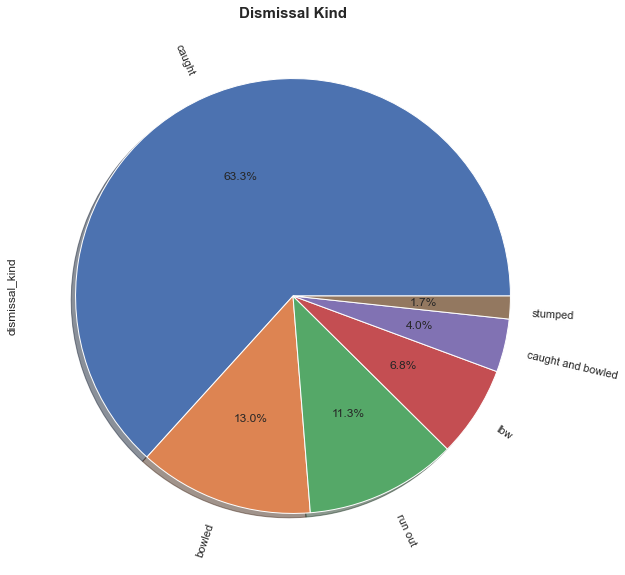

In [63]:
df_rohit['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, rotatelabels=True)
plt.title('Dismissal Kind', fontsize=15, fontweight='bold')
plt.show()

In [64]:
print("Runs scored from 1's: ", count(df_rohit, 1))
print("Runs scored from 2's: ", count(df_rohit, 2))
print("Runs scored from 3's: ", count(df_rohit, 3))
print("Runs scored from 4's: ", count(df_rohit, 4))
print("Runs scored from 6's: ", count(df_rohit, 6))

Runs scored from 1's:  1663
Runs scored from 2's:  428
Runs scored from 3's:  18
Runs scored from 4's:  1832
Runs scored from 6's:  1284


In [65]:
match_df[match_df['result_margin']==match_df['result_margin'].max()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017


In [66]:
runs = ball_df.groupby('batsman')['batsman_runs'].sum().reset_index()
runs.columns = ['Batsman', 'Runs']
y = runs.sort_values(by='Runs', ascending=False).head(10).reset_index().drop('index', axis=1)
y

,Batsman,Runs
0,V Kohli,5878
1,SK Raina,5368
2,DA Warner,5254
3,RG Sharma,5230
4,S Dhawan,5197
5,AB de Villiers,4849
6,CH Gayle,4772
7,MS Dhoni,4632
8,RV Uthappa,4607
9,G Gambhir,4217


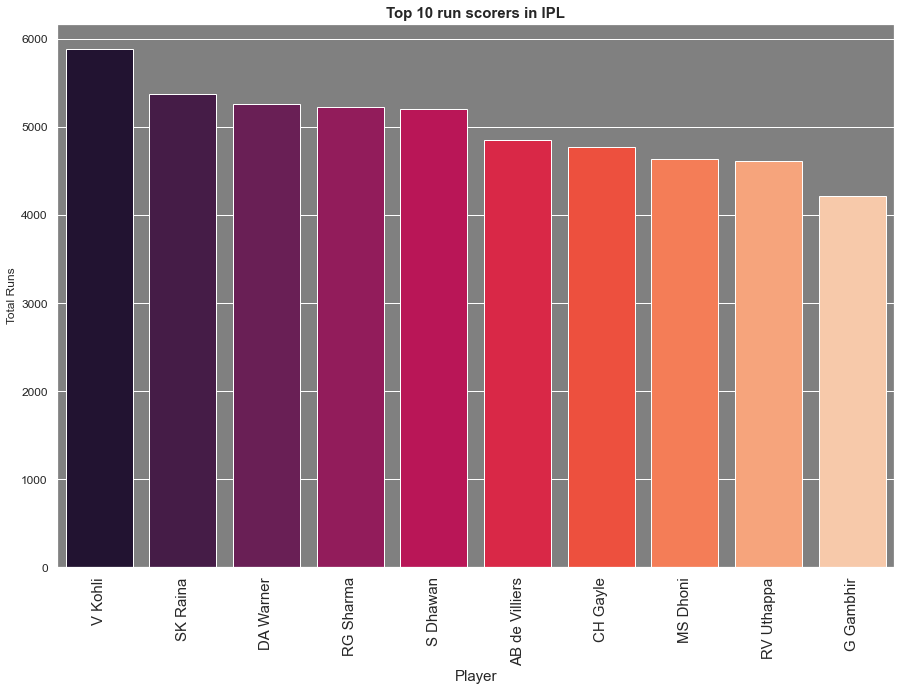

In [69]:
ax = plt.axes()
ax.set(facecolor='grey')
sns.barplot(x=y['Batsman'], y=y['Runs'], palette='rocket', saturation=1)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('Player', fontsize=15)
plt.ylabel('Total Runs', fontsize=12)
plt.title('Top 10 run scorers in IPL', fontsize=15, fontweight='bold')
plt.show()

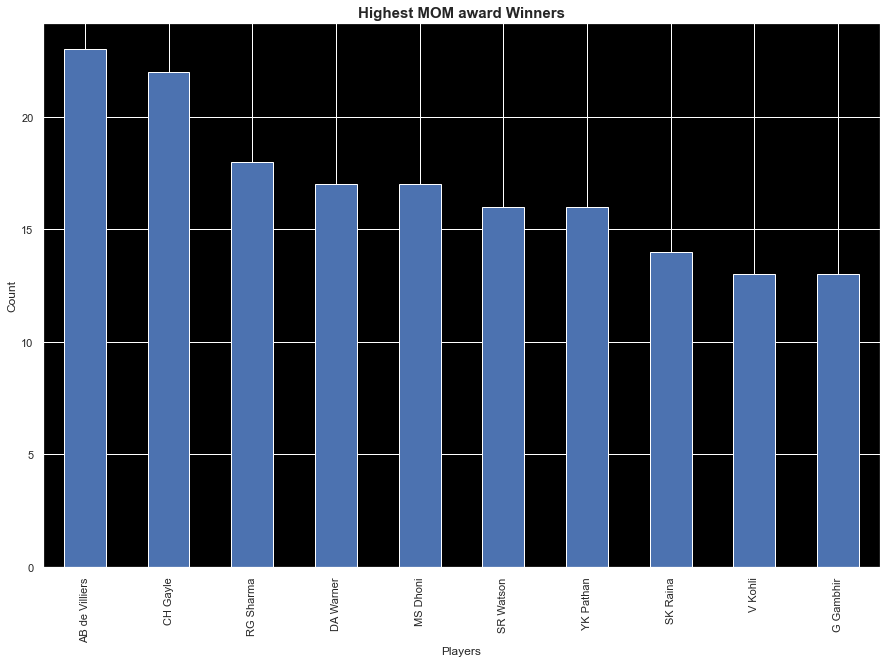

In [70]:
ax = plt.axes()
ax.set(facecolor='black')
match_df.player_of_match.value_counts()[:10].plot(kind='bar')
plt.xlabel('Players')
plt.ylabel('Count')
plt.title('Highest MOM award Winners', fontsize=15, fontweight='bold')
plt.show()